In [24]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [25]:
# Calculate metrics
def calculate_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mae, mse, rmse, r2

In [26]:
df = pd.read_excel('data_Finel.xlsx')
df.head()

,Field of activity,Process / Machine / Equipement,Risk Related,Risk Causes,Risk Effects,Severity (1-10),Occurrence (1-10),Impact (1-10),Criticality (Severity * Occurrence * Impact)
0,Office administrative / support/ other busines...,Production,Operator error,Insufficient training,Damage to machinery,7,8,9,504
1,Automotive industry,Production,Improper use of extension cords,"Overloading, improper connections","Fire, equipment damage",4,7,10,280
2,Dyeing of textile and clothing,Management,Leadership turnover,High executive turnover,Decreased morale,8,5,1,40
3,Financial services incl. Insurance business,Production,Calibration errors,Poor calibration practices,Inconsistent product quality,5,6,3,90
4,Actitivities of membership organisations,Compliance,Non-compliance with labor laws,Lack of awareness,Legal penalties,7,4,7,196


In [27]:
# Encode categorical variables using one-hot encoding
df_encoded = pd.get_dummies(df, columns=[
    'Field of activity', 'Process / Machine / Equipement', 'Risk Related', 'Risk Causes', 'Risk Effects'
])

# Separate features and target
X = df_encoded.drop(columns=['Criticality (Severity * Occurrence * Impact)'])
y = df_encoded['Criticality (Severity * Occurrence * Impact)']

In [28]:
X

,Severity (1-10),Occurrence (1-10),Impact (1-10),Field of activity_Accounting activities,Field of activity_Actitivities of membership organisations,"Field of activity_Active medical devices, active implantable medical devices, implantable medical devices and sterilization of medical devices","Field of activity_Activities of blood banks, transplant organ banks, blood laboratories etc.",Field of activity_Advertising and market research,Field of activity_Aerospace,"Field of activity_Agriculture, Forestry",...,"Risk Effects_Stockouts, overstock",Risk Effects_Sudden machine stops,Risk Effects_System vulnerabilities,"Risk Effects_Theft, vandalism","Risk Effects_Trade restrictions, financial losses","Risk Effects_Undetected faults, safety hazards",Risk Effects_Uneven slicing,Risk Effects_Unexpected failures,Risk Effects_Unfair evaluations,Risk Effects_Widespread contamination
0,7,8,9,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,4,7,10,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,8,5,1,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,5,6,3,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,7,4,7,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29555,5,6,1,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29556,9,6,4,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29557,1,8,7,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29558,5,8,9,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [29]:
y

0        504
1        280
2         40
3         90
4        196
        ... 
29555     30
29556    216
29557     56
29558    360
29559      4
Name: Criticality (Severity * Occurrence * Impact), Length: 29560, dtype: int64

In [30]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

In [31]:
# Build an FNN network model
model = Sequential([
    Dense(128, input_dim=X_train.shape[1], activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')  # Linear activation for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mae', metrics=['mae'])

C:\Users\MOHAMMED SAID\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [32]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
592/592 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 103.4471 - mae: 103.4471 - val_loss: 17.2306 - val_mae: 17.2306
Epoch 2/50
592/592 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 15.7720 - mae: 15.7720 - val_loss: 10.4203 - val_mae: 10.4203
Epoch 3/50
592/592 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 9.3901 - mae: 9.3901 - val_loss: 6.6555 - val_mae: 6.6555
Epoch 4/50
592/592 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 6.9052 - mae: 6.9052 - val_loss: 6.2098 - val_mae: 6.2098
Epoch 5/50
592/592 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 5.9190 - mae: 5.9190 - val_loss: 5.7677 - val_mae: 5.7677
Epoch 6/50
592/592 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 5.3228 - mae: 5.3228 - val_loss: 6.5333 - val_mae: 6.5333
Epoch 7/50
592/592 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 5.3096 - mae: 5.3096 - val_loss: 4.6463 - val_mae: 4.6463
Epoch 8/50
592/592 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 4.9070 - mae: 4.9070 - val_loss: 6.6924 - val_mae: 6.6924
Epoch 9/50
592/592 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms

In [33]:
import joblib
joblib.dump(model, 'FNN_model.joblib')

['FNN_model.joblib']

In [34]:
# Evaluate the model on the test set
loss, mae = model.evaluate(X_test, y_test)
print(f"Test Mean Absolute Error: {mae}")

185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.9092 - mae: 2.9092
Test Mean Absolute Error: 2.9300179481506348


In [35]:
# Make predictions
predictions = model.predict(X_test)

# Compare predictions to actual values
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': predictions.flatten()})
comparison.head(10)

185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Actual,Predicted
28260,10.0,10.216591
15601,224.0,221.019608
7839,54.0,56.497578
4850,126.0,120.956909
4699,135.0,135.107590
21200,72.0,72.040749
21373,280.0,278.713043
12965,8.0,8.744131
2943,300.0,303.181915
26983,20.0,20.537355


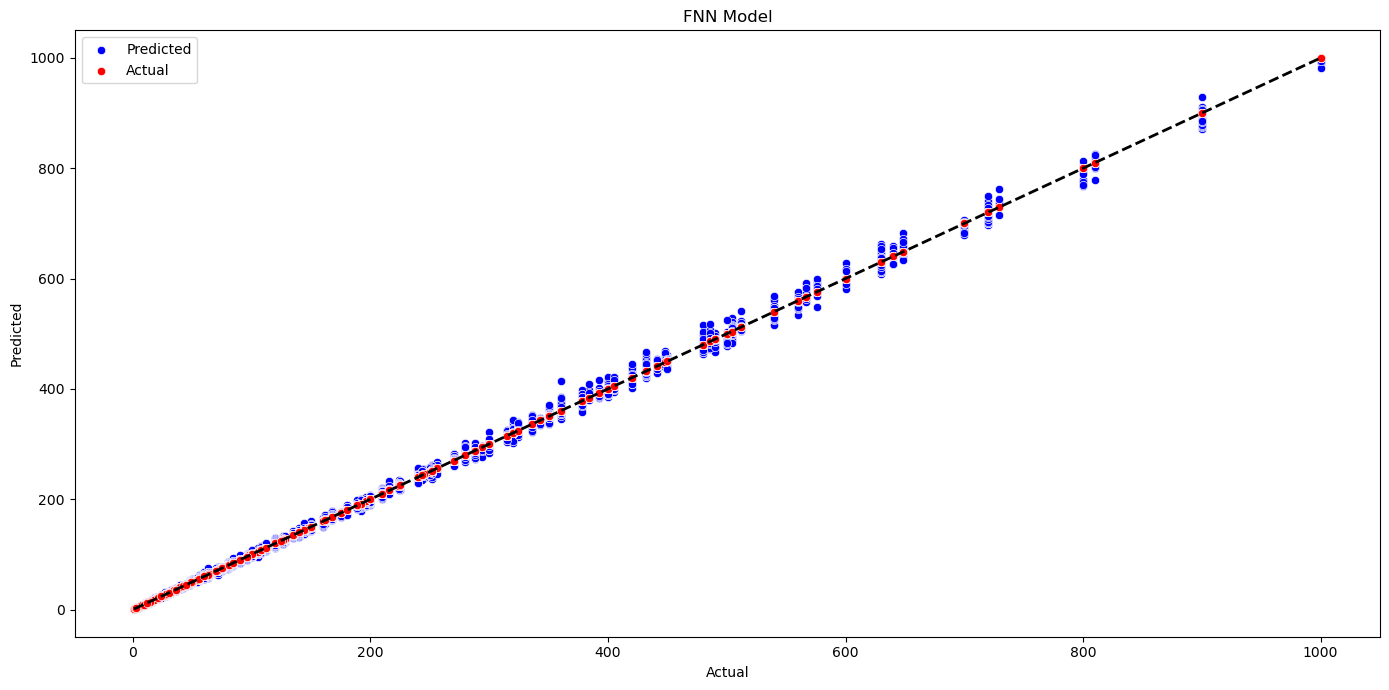

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the results
plt.figure(figsize=(14, 7))

# MLP Model
plt.subplot(1, 1, 1)

# Plot predicted values in blue
sns.scatterplot(x=y_test, y=predictions.flatten(), color='blue', label='Predicted')

# Plot actual values in red
sns.scatterplot(x=y_test, y=y_test, color='red', label='Actual')

# Plot the identity line (45-degree line) for reference
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)

# Labels and title
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('FNN Model')

# Show legend
plt.legend()

# Add titles and layout adjustments
plt.tight_layout()
plt.show()

In [37]:
mae, mse, rmse, r2 = calculate_metrics(y_test, predictions)
print(f"  FNN Model Metrics:")
print(f"  Mean Absolute Error (MAE): {mae}")
print(f"  Mean Squared Error (MSE): {mse}")
print(f"  Root Mean Squared Error (RMSE): {rmse}")
print(f"  R^2 Score: {r2}\n")

  FNN Model Metrics:
  Mean Absolute Error (MAE): 2.930018424987793
  Mean Squared Error (MSE): 24.79036521911621
  Root Mean Squared Error (RMSE): 4.978992462158203
  R^2 Score: 0.9991387877176181



In [38]:
import joblib
joblib.dump(model, 'fnn_model.joblib')

['fnn_model.joblib']